# Task 4 with Augementation

#### Import TensorFlow

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

#### Define Methods

In [2]:
def evaluate(testSet, testLabels, testModel):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = testModel.evaluate(testSet, testLabels, verbose=2) 
    print("ACCURACY: " + str(test_acc))   
    
def displaySamplesFromDataSet(xDataSet, yDataset):
    # define number of images to show
    num_row = 2
    num_col = 8
    num= num_row*num_col
    
    # get images
    images = xDataSet[0:num]
    labels = yDataset[0:num]
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes[i//num_col, i%num_col]
         ax.imshow(images[i].squeeze(), cmap='gray_r')
         ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()
    
def augment(rotationAngleRange, zoomRange, shiftx, shifty, xDataSet, yDataset, label):
    datagen = ImageDataGenerator(rotation_range=rotationAngleRange,zoom_range=zoomRange,
                                width_shift_range=shiftx, height_shift_range=shifty,
                                fill_mode='nearest', rescale=1./255)

    xDataSet = xDataSet.reshape(xDataSet.shape[0], 28, 28, 1)
    datagen.fit(xDataSet)
    
    # define number of rows & columns
    num_row = 2
    num_col = 8
    num= num_row*num_col

    # plot before
    print(label + ' BEFORE:\n')
    fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes1[i//num_col, i%num_col]
         ax.imshow(xDataSet[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(yDataset[i]))
    plt.tight_layout()
    plt.show()

     # plot after
    print(label + ' AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    generator = datagen.flow(
        xDataSet,
        yDataset,
        batch_size=num,
        shuffle=False) 
    
    for X, Y in generator:
        for i in range(0, num):
              ax = axes2[i//num_col, i%num_col]
              ax.imshow(X[i].reshape(28,28), cmap='gray_r')
              ax.set_title('Label: {}'.format(int(Y[i])))
        break
    plt.tight_layout()
    plt.show()
    return generator

def displayAndPreditSamplesFromDataSet(xDataSet, yDataset, model):
    # define number of images to show
    num_row = 2
    num_col = 8
    num= num_row*num_col
    
    # get images
    images = xDataSet[0:num]
    labels = yDataset[0:num]
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        image = images[i]
        image = image.reshape(-1, 28, 28, 1)
        
        prediction = model.predict(image)
        classID = np.argmax(prediction)
        #print(prediction[0:])
        
        ax = axes[i//num_col, i%num_col]
        ax.imshow(image.squeeze(), cmap='gray_r')
        
        ax.set_title('L: {} P:{}'.format(labels[i], classID))
    plt.tight_layout()
    plt.show()

#### Load MNIST Dataset

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Training

TRAIN BEFORE:



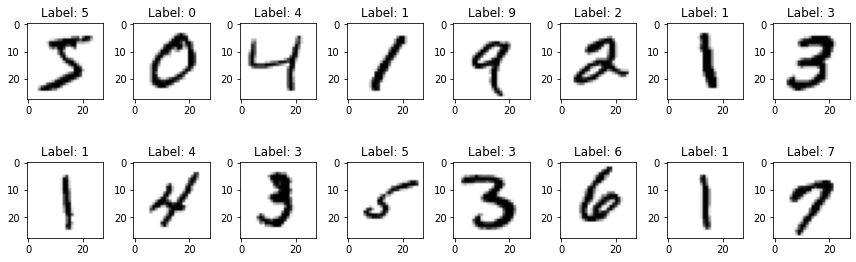

TRAIN AFTER:



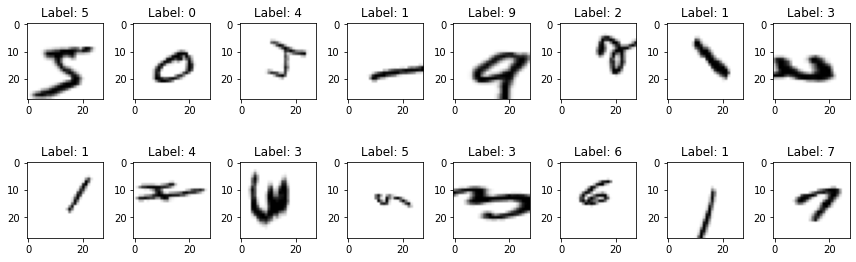

In [4]:
train_generator = augment(100, [0.5,2], 0.25, 0.25, train_images, train_labels, "TRAIN")

### Test

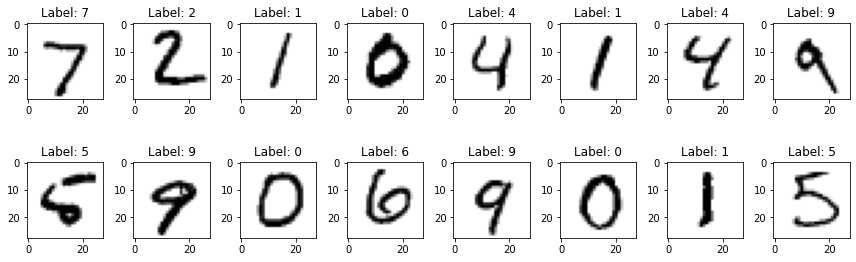

In [5]:
displaySamplesFromDataSet(test_images, test_labels)

#### Flip Image

In [6]:
def flip_image(images):
  flipped_images = []

  for img in images:
    flipped_images.append(cv2.flip(img, 0))
  return flipped_images

In [7]:
test_flipped_images = flip_image(test_images)
test_flipped_images = np.array(test_flipped_images, dtype=np.float32) / 255
test_flipped_images = test_flipped_images.reshape(-1, 28, 28, 1)

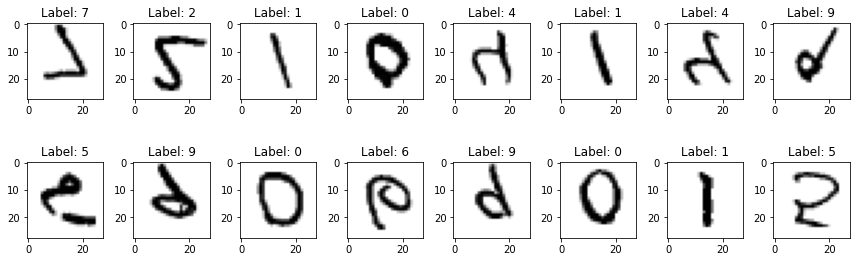

In [8]:
displaySamplesFromDataSet(test_flipped_images, test_labels)

#### Build and Train Model

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_generator,epochs=5,validation_data=(test_flipped_images, test_labels),batch_size=16)

Epoch 1/5
3750/3750 [==============================] - 21s 4ms/step - loss: 1.3934 - accuracy: 0.5145 - val_loss: 2.7047 - val_accuracy: 0.4575
Epoch 2/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.7810 - accuracy: 0.7451 - val_loss: 4.5144 - val_accuracy: 0.4538
Epoch 3/5
3750/3750 [==============================] - 16s 4ms/step - loss: 0.6447 - accuracy: 0.7911 - val_loss: 4.2330 - val_accuracy: 0.4669
Epoch 4/5
3750/3750 [==============================] - 16s 4ms/step - loss: 0.5828 - accuracy: 0.8109 - val_loss: 4.1383 - val_accuracy: 0.4628
Epoch 5/5
3750/3750 [==============================] - 17s 4ms/step - loss: 0.5346 - accuracy: 0.8270 - val_loss: 4.4569 - val_accuracy: 0.4591


313/313 - 1s - loss: 4.4569 - accuracy: 0.4591
ACCURACY: 0.45910000801086426


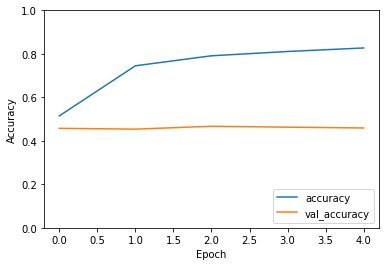

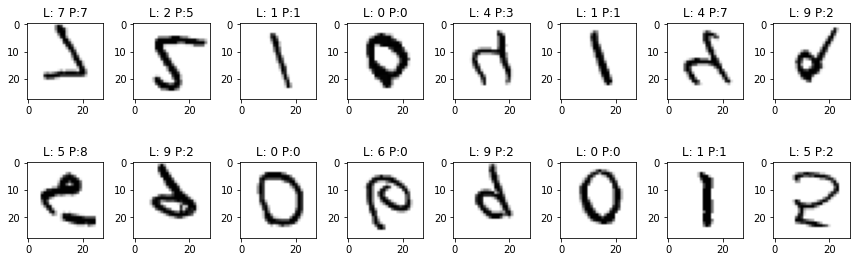

In [10]:
evaluate(test_flipped_images, test_labels, model)
displayAndPreditSamplesFromDataSet(test_flipped_images, test_labels, model)